# Análises de Preço de Diamantes por Característica


## Jonatha Rodrigues T. Vaz

# Iniciando 



## Importações das Bibliotecas
## Leitura do Arquivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('diamonds_dataset.csv')

## Visualizando o Arquivo em poucas Linhas

In [4]:
df.head(5)

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM


## Executando comando de Número correspondente a Colunas e Linhas.

In [5]:
df.shape

(119307, 11)

### Executando comando para obter Informações número de colunas, rótulos de coluna, tipos de dados de coluna, uso de memória, índice de intervalo e o número de células em cada coluna (valores não nulos)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119307 entries, 0 to 119306
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            119307 non-null  int64  
 1   url           119307 non-null  object 
 2   shape         119307 non-null  object 
 3   price         119307 non-null  int64  
 4   carat         119307 non-null  float64
 5   cut           119307 non-null  object 
 6   color         119307 non-null  object 
 7   clarity       119307 non-null  object 
 8   report        119307 non-null  object 
 9   type          119307 non-null  object 
 10  date_fetched  119307 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 10.0+ MB


## Executando comando para Obter Ordenação do Dados e seus Valores Númericos, estatísticas descritivas, média, desvio padrão, máximo, mínimo, tendências centrais e forma da distribuição

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,119307.0,9.905507e+06,237382.378523,436773.00,9854352.0,9978096.0,10054327.5,10092253.00
price,119307.0,3.286843e+03,9114.695376,270.00,900.0,1770.0,3490.0,1348720.00
carat,119307.0,8.841687e-01,0.671141,0.25,0.4,0.7,1.1,15.32


## Exibição do Primeiro Gráfico com o Seaborn e Matplotlib para Visualizar possível Correlação entre as Colunas "x" e "y" (caracter e preço do Diamante)

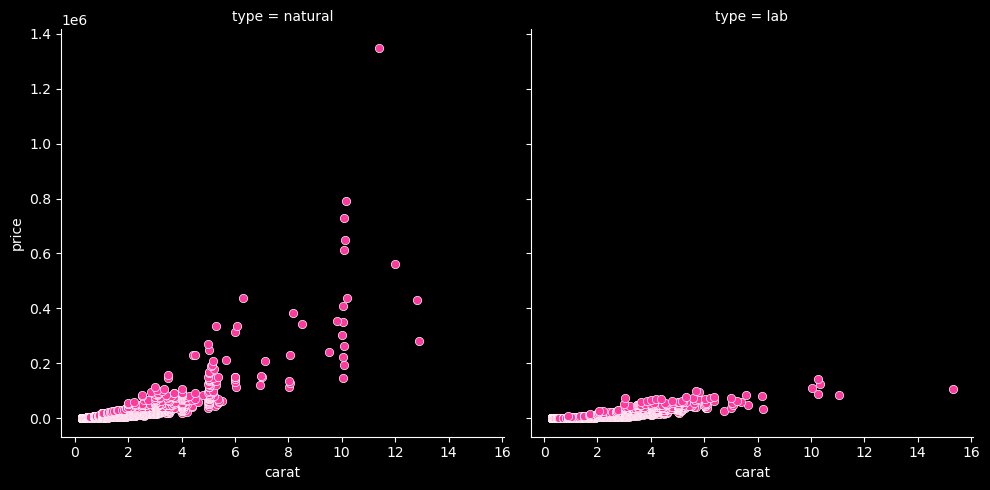

In [27]:
sns.relplot(x='carat', y='price', data=df, col='type', color='#fe3a9e')
plt.tight_layout()

## Executando Comando para Exibir Gráfico de Comparação entre Soma do Preço e Preço Médio dos Diamantes sendo eles Naturais ou Lab

In [28]:
type_group = df.groupby('type')
types = [type.capitalize() for type, df in type_group]

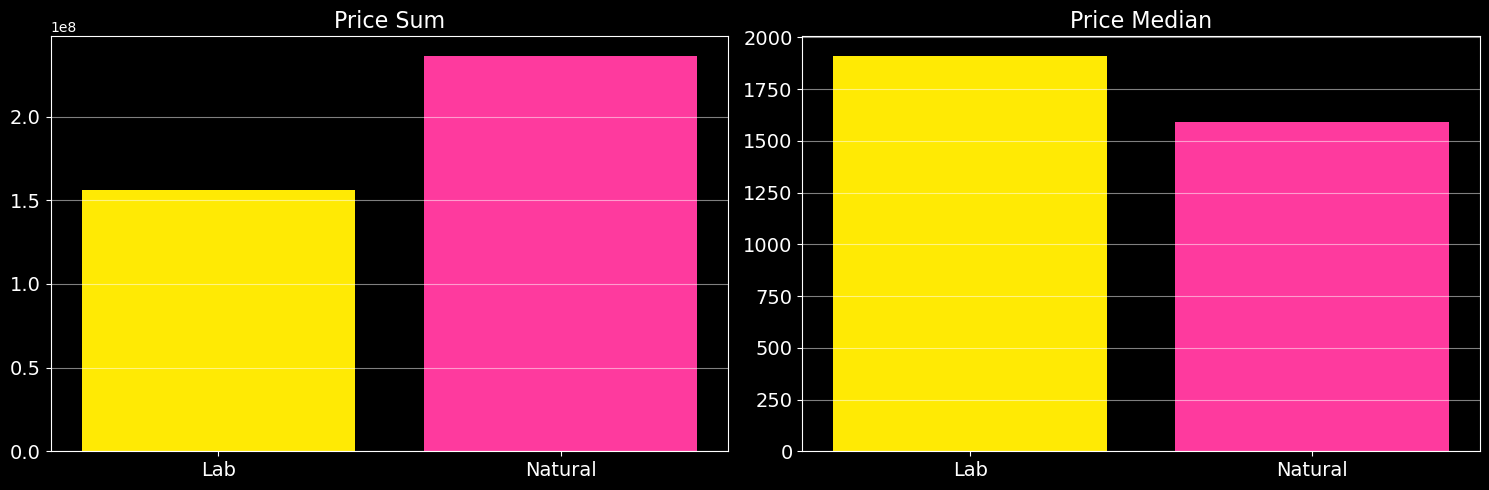

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

ax1.bar(types, type_group['price'].sum(), color=['#ffea04', '#fe3a9e'])
ax1.tick_params(axis='both', labelsize=14)
ax1.set_title('Price Sum', fontsize=16)
ax1.grid(axis='y', alpha=0.5)

ax2.bar(types, type_group['price'].median(), color=['#ffea04', '#fe3a9e'])
ax2.tick_params(axis='both', labelsize=14)
ax2.set_title('Price Median', fontsize=16)
ax2.grid(axis='y', alpha=0.5)

plt.tight_layout()

## Visualizando em Gráficos a Característica dos Diamantes por seu Preço (Muito bom, Ideal, Super Ideal, Bom e Justo)

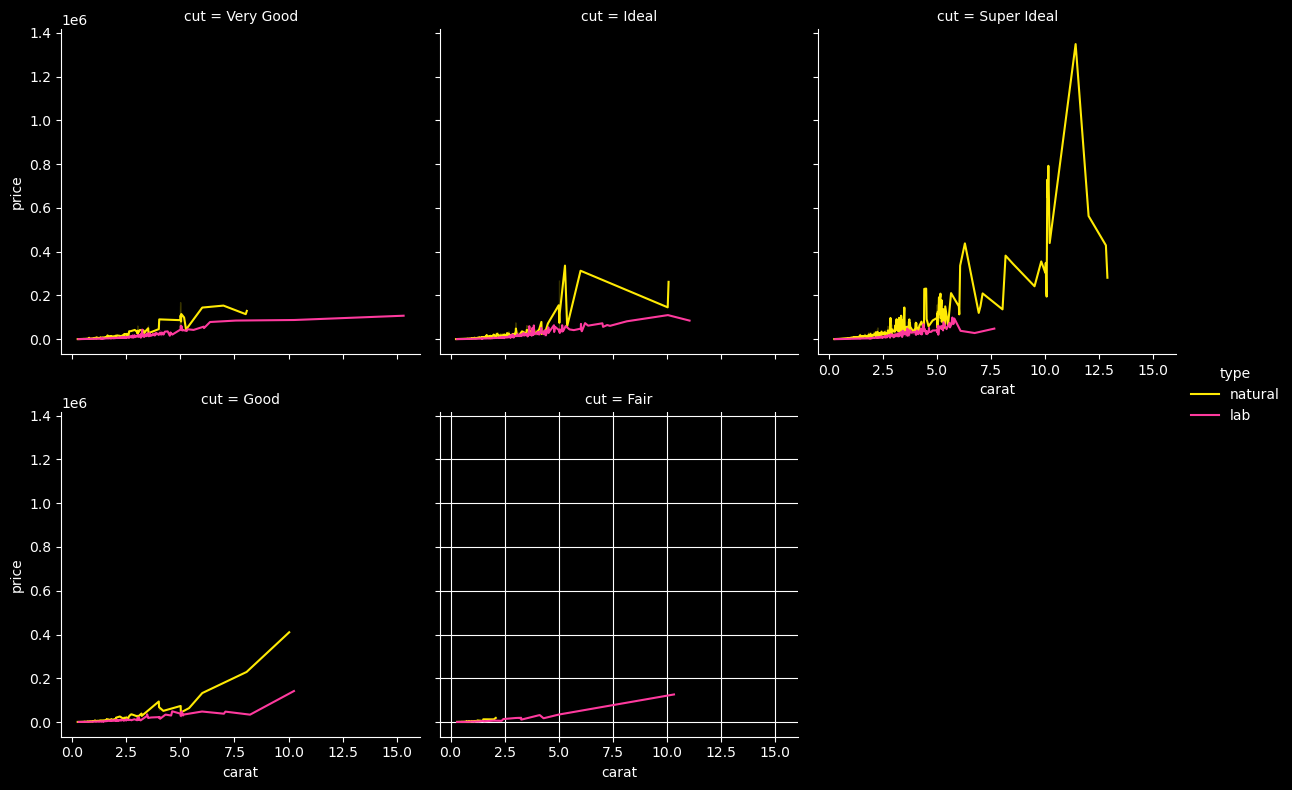

In [30]:
sns.relplot(x='carat', y='price', data=df, kind='line', hue='type', palette=['#ffea04', '#fe3a9e'], col='cut', col_wrap=3, height=4)
plt.grid(alpha=1.0)

## Visualizando Gráfico de Preço Médio das Formas dos Diamantes

In [31]:
shape_group = df.groupby('shape')
shapes = [shape for shape, df in shape_group]

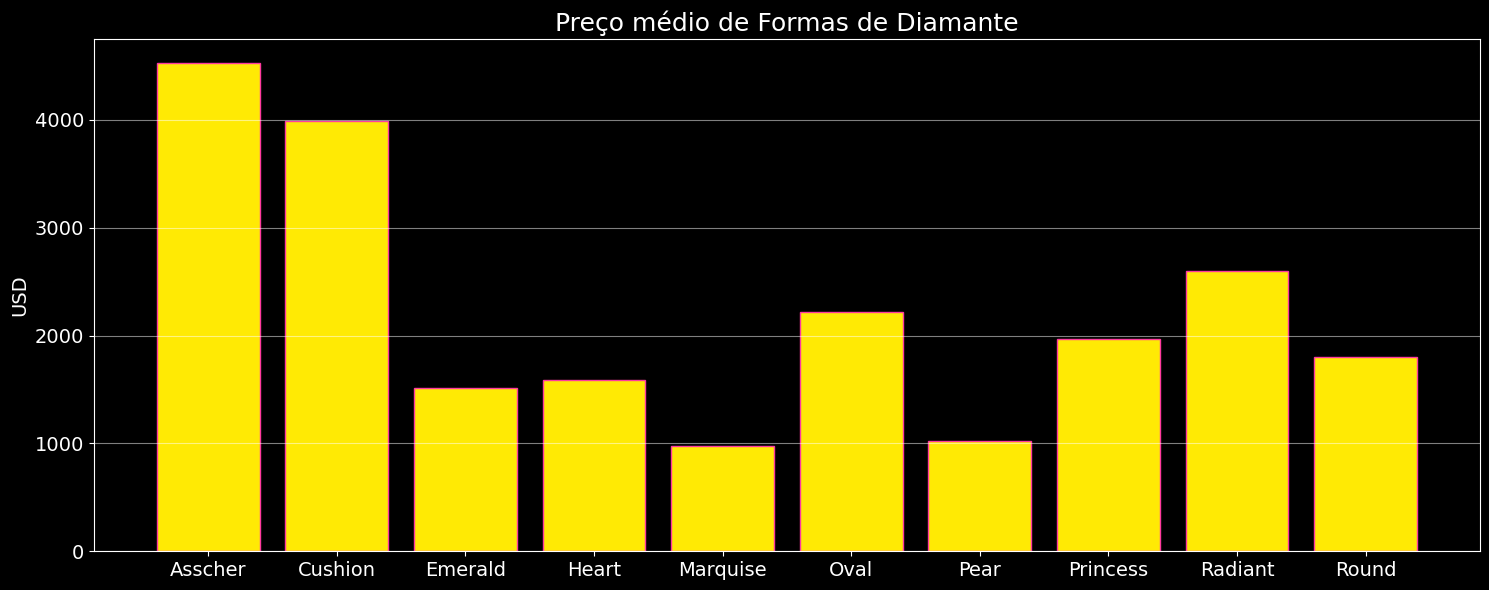

In [33]:
plt.figure(figsize=(15,6))
plt.bar(shapes, shape_group['price'].median(), edgecolor='#fe3a9e', color='#ffea04')
plt.title('Preço médio de Formas de Diamante', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('USD', fontsize=14)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

## Executando Comandos para Análises dos Preços, Tipos e Carcterísticas dos Diamantes, com o Matplotlib

In [34]:
grouper = df.groupby(['type', 'shape'])
lab_count = grouper['price'].count()['lab']
natural_count = grouper['price'].count()['natural']

In [35]:
x_indexes = np.arange(len(shapes))
width = 0.25

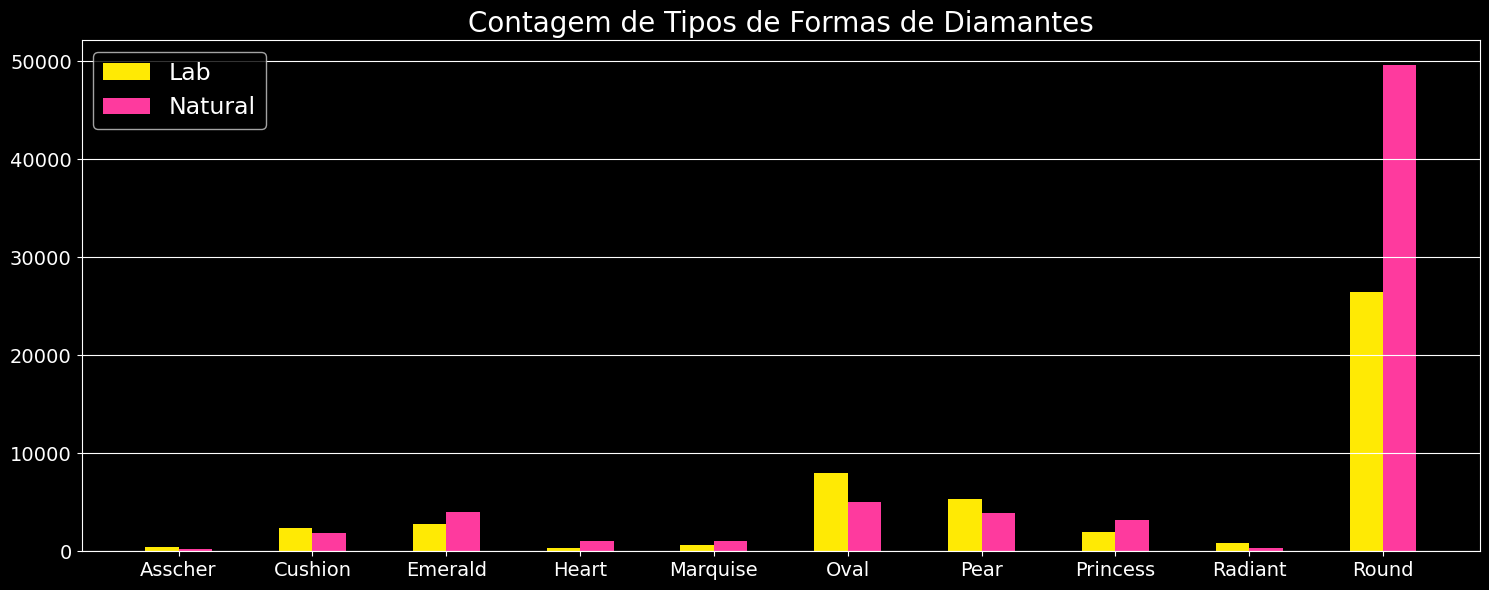

In [41]:
plt.figure(figsize=(15,6))

plt.bar(x_indexes - (width/2), lab_count, width=width, color='#ffea04', label='Lab')
plt.bar(x_indexes + (width/2), natural_count, width=width, color='#fe3a9e', label='Natural')


plt.title('Contagem de Tipos de Formas de Diamantes', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(ticks=x_indexes, labels=shapes, fontsize=14)

plt.grid(axis='y', alpha=1.0)
plt.legend(prop={'size':17})
plt.tight_layout()

## Análisando o Preço Médio por Corte de Diamante através de suas Características

In [42]:
cut_group = df.groupby('cut')
cuts = [cut for cut, df in cut_group]

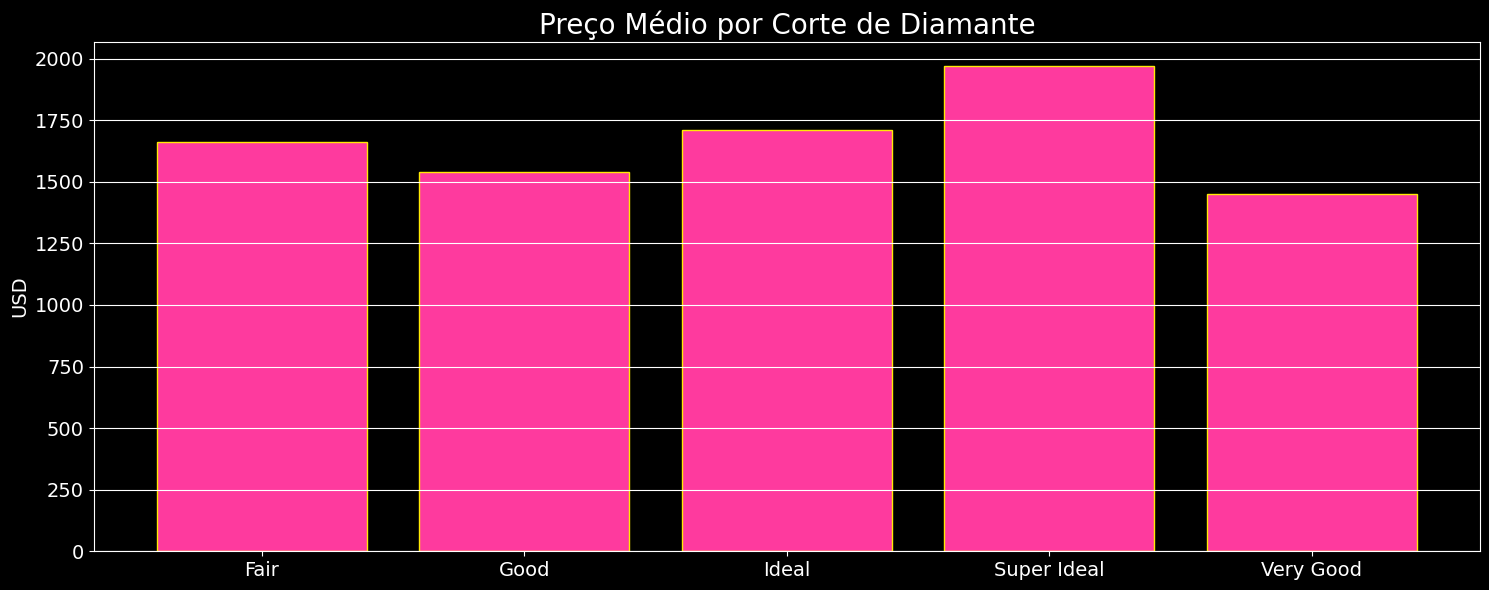

In [45]:
plt.figure(figsize=(15,6))
plt.bar(cuts, cut_group['price'].median(), edgecolor='#ffea04', color='#fe3a9e')
plt.title('Preço Médio por Corte de Diamante', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('USD', fontsize=14)

plt.grid(axis='y', alpha=1.0)
plt.tight_layout()

## Análisando o Preço Médio por Cor do Diamante

In [46]:
color_group = df.groupby('color')
colors = [color for color, df in color_group]

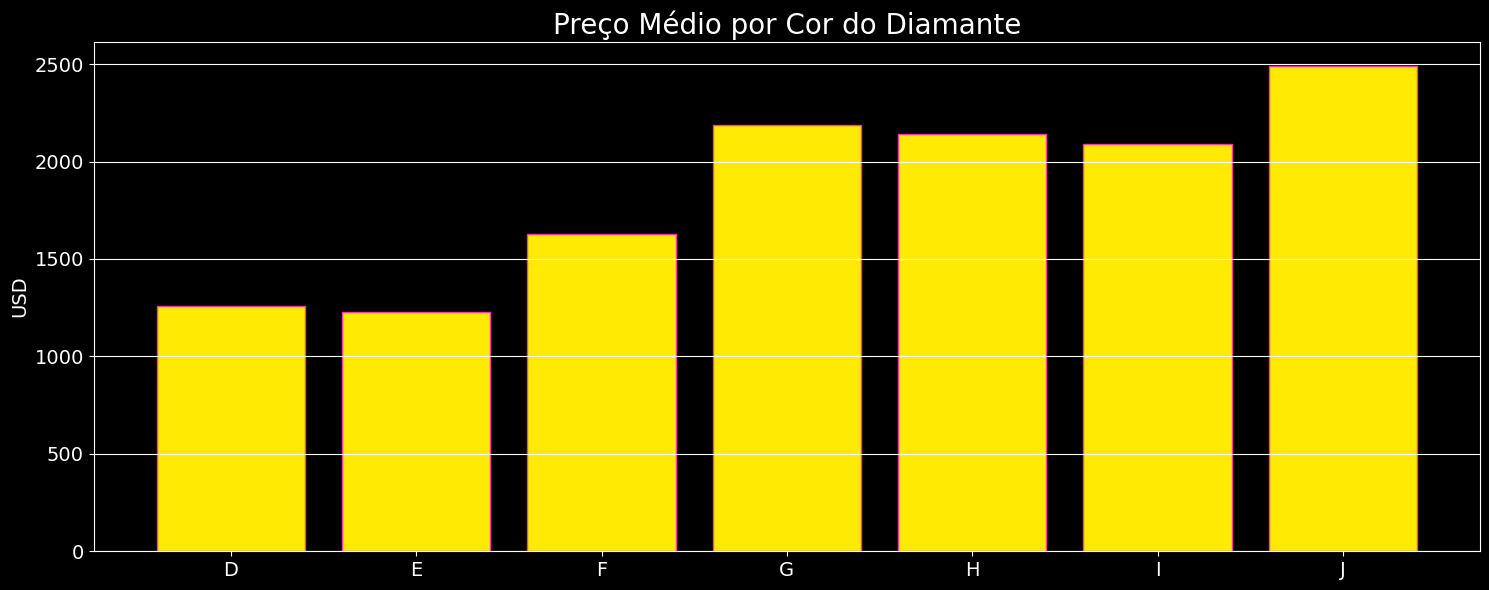

In [47]:
plt.figure(figsize=(15,6))
plt.bar(colors, color_group['price'].median(), edgecolor='#fe3a9e', color='#ffea04')
plt.title('Preço Médio por Cor do Diamante', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('USD', fontsize=14)

plt.grid(axis='y', alpha=1.0)
plt.tight_layout()

### Análisando o Preço Médio por Claridade ( Modelo ou Pureza ) do Diamante

In [48]:
clarity_group = df.groupby('clarity')
clarities = [clarity for clarity, df in clarity_group]

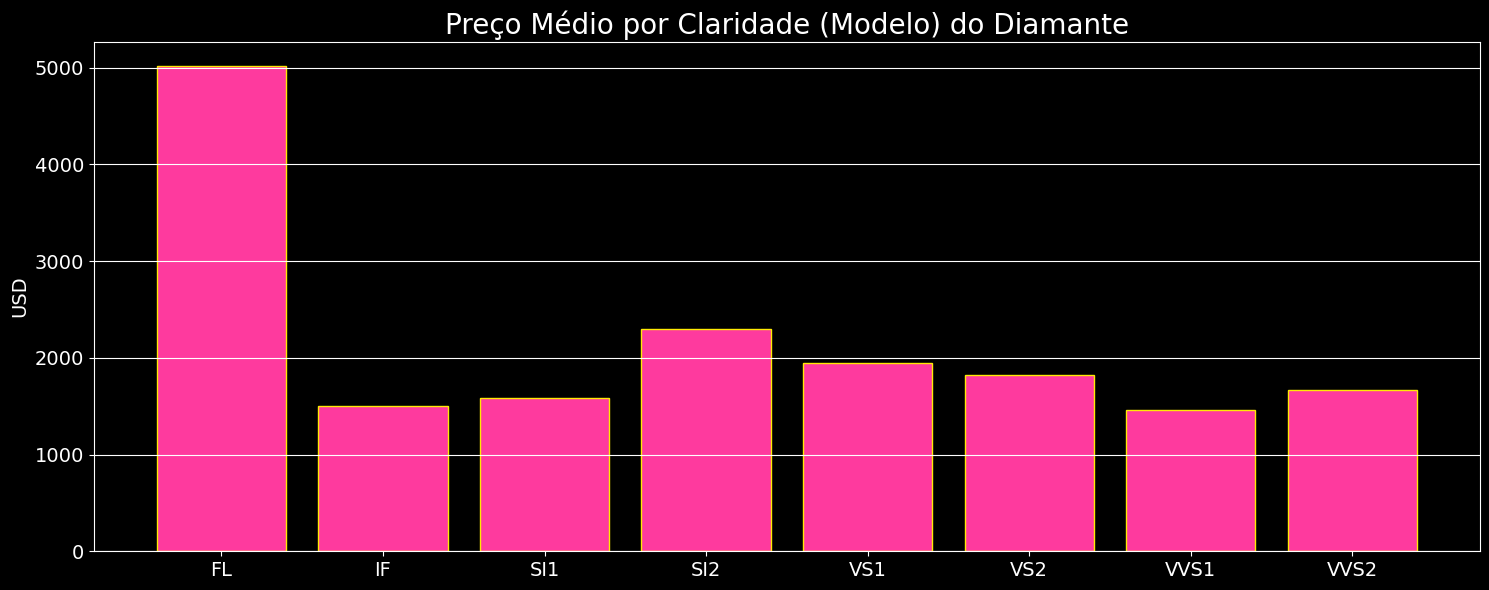

In [50]:
plt.figure(figsize=(15,6))
plt.bar(clarities, clarity_group['price'].median(), edgecolor='#ffea04', color='#fe3a9e')
plt.title('Preço Médio por Claridade (Modelo) do Diamante', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('USD', fontsize=14)

plt.grid(axis='y', alpha=1.0)
plt.tight_layout()

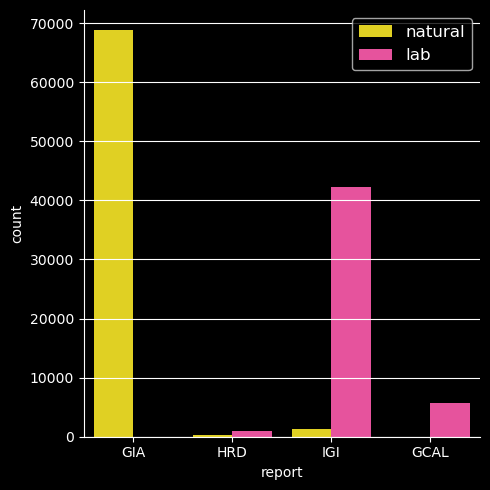

In [52]:
sns.catplot(x='report', data=df, kind='count', hue='type', palette=['#ffea04', '#fe3a9e'], legend=False)

plt.grid(axis='y', alpha=1.0)
plt.legend(loc='upper right', prop={'size':12})
plt.tight_layout()

# Análise Final :


### Ao analisarmos e fazermos um estudo completo com o arquivo, a conclusão é que, de acordo com o Modelo, Pureza, Corte e Tipo do Diamante determinará seu Preço, sendo maior, justo ou menor. Vejamos um exemplo, um Diamante VVS, 100% Puro, sem Corte e Colorido irá valer mais em comparação a um Diamante Âmbar natural e incolor. 






#### OBS: Modelo de Arquivo usado é dos EUA, logo, o estudo e análise realizada é de acordo com os Diamantes da América do Norte, sobretudo, fica em aberto se os Diamantes são comprados e transportados de outras Regiões do Mundo, como o Brasil, África e Arábia Saudita, onde a extração e mineração dessas pedras é muito alta. 